## Models

### Author: Lucia Zou
### Contact: lucia.zouyuebca@gmail.com
### Date: Nov.8th, 2023

### Table of Contents
- [Data Dictionary](#Data-Dictionary)
- [Linear Regression](#Linear-Regression)
- [Decision Tree](#Decision-Tree)
- [Random Forest](#Random-Forest)
- [Compare Models](#Compare-Models)

### Data Dictionary
| Column Name                | Description                                                                                                                       | DataTypes |
|----------------------------|-----------------------------------------------------------------------------------------------------------------------------------|------------|
| invoice_and_item_number    | Concatenated invoice and line number associated with the liquor sold. This provides a unique identifier for the individual liquor products included in the store's sales. | object     |
| date                       | Date of sale.                                                                                                                     | object     |
| store_number               | Unique number assigned to the store that sold the liquor.                                                                         | int64      |
| store_name                 | Name of the store that sold the liquor.                                                                                            | object     |
| address                    | Address of the store that sold the liquor.                                                                                        | object     |
| city                       | City where the store that sold the liquor is located.                                                                             | object     |
| zip_code                   | ZIP code where the store that sold the liquor is located.                                                                         | float64    |
| county_number              | Iowa county number for the county where the store that sold the liquor is located.                                             | float64    |
| county                     | County where the store that sold the liquor is located.                                                                           | object     |
| category                   | Category code associated with the liquor sold.                                                                                    | float64    |
| category_name              | Category of the liquor sold.                                                                                                      | object     |
| vendor_number              | The vendor number of the company for the brand of liquor sold.                                                                    | float64    |
| vendor_name                | The vendor name of the company for the brand of liquor sold.                                                                      | object     |
| item_number                | Item number for the individual liquor product sold.                                                                               | int64      |
| item_description           | Description of the individual liquor product sold.                                                                               | object     |
| pack                       | The number of bottles in a case for the liquor sold.               | int64      |
| bottle_volume_ml           | Volume of each liquor bottle sold in milliliters.                         | int64      |
| Alcohol_Type           | The general type of alcohol.                       | Object    |
| profit   | Total profit of liquor sold.                       | float64   |
| day     | The day of sale.                                   | object    |
| week    | The week of sale.                                  | object    |
| volume_3 | Volume of liquor in liters between 50.01 to 100L.  | uint8     |
| volume_4 | Volume of liquor in liters between 100.01 to 200L. | uint8     |
| volume_5 | Volume of liquor in liters larger than 200.01 L.   | uint8     |

### 

In [44]:
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

In [211]:
df9=pd.read_parquet('IowaNew.parquet')

In [100]:
df9.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,category,...,item_description,pack,bottle_volume_ml,Alcohol_Type,profit,day,week,volume_3,volume_4,volume_5
1418613,INV-36026900017,2021-04-22,2572,Hy-VeeFoodStore/CedarFalls,6301University,CedarFalls,50613.0,7.0,Carroll,1081400.0,...,99PeppermintMini,10,50,Schnapps,5.16,22,16,0,0,0
2429266,INV-40933700033,2021-10-13,4073,"UptownLiquor,Llc",306Hwy69South,ForestCity,50436.0,95.0,Mills,1031200.0,...,UVBlueRaspberry,6,1750,Vodka,34.50,13,41,0,0,0
125406,INV-42098600015,2021-11-17,2685,Hy-Vee-Garner,255WestUSHWY18,Garner,50438.0,41.0,Madison,1012100.0,...,CanadianClubWhisky,6,1750,Whisky,43.50,17,46,0,0,0
2252745,INV-36544600001,2021-05-12,5202,Casey'sGeneralStore#2900/Gilber,"115,25thAve",Gilbertville,50634.0,7.0,Carroll,1071100.0,...,TootersAlaBamaSlama,12,375,Cocktail,1.00,12,19,0,0,0
695507,INV-42759700022,2021-12-09,3757,Wal-Mart3590/SiouxCity,3101FloydBlvd,SiouxCity,51108.0,97.0,Guthrie,1081400.0,...,99RootBeerMini,10,50,Schnapps,25.80,9,49,0,0,0


In [101]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1418613 to 1602341
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_and_item_number  50000 non-null  object        
 1   date                     50000 non-null  datetime64[ns]
 2   store_number             50000 non-null  int64         
 3   store_name               50000 non-null  object        
 4   address                  50000 non-null  object        
 5   city                     50000 non-null  object        
 6   zip_code                 50000 non-null  float64       
 7   county_number            50000 non-null  float64       
 8   county                   50000 non-null  object        
 9   category                 50000 non-null  float64       
 10  category_name            50000 non-null  object        
 11  vendor_number            50000 non-null  float64       
 12  vendor_name             

###

### Linear Regression

In [102]:
# Get the numeric columns
numeric_columns = df9.select_dtypes(include='number')

In [103]:
X = numeric_columns.drop(['profit'], axis=1)
y = df9['profit']

In [104]:
X.shape

(50000, 13)

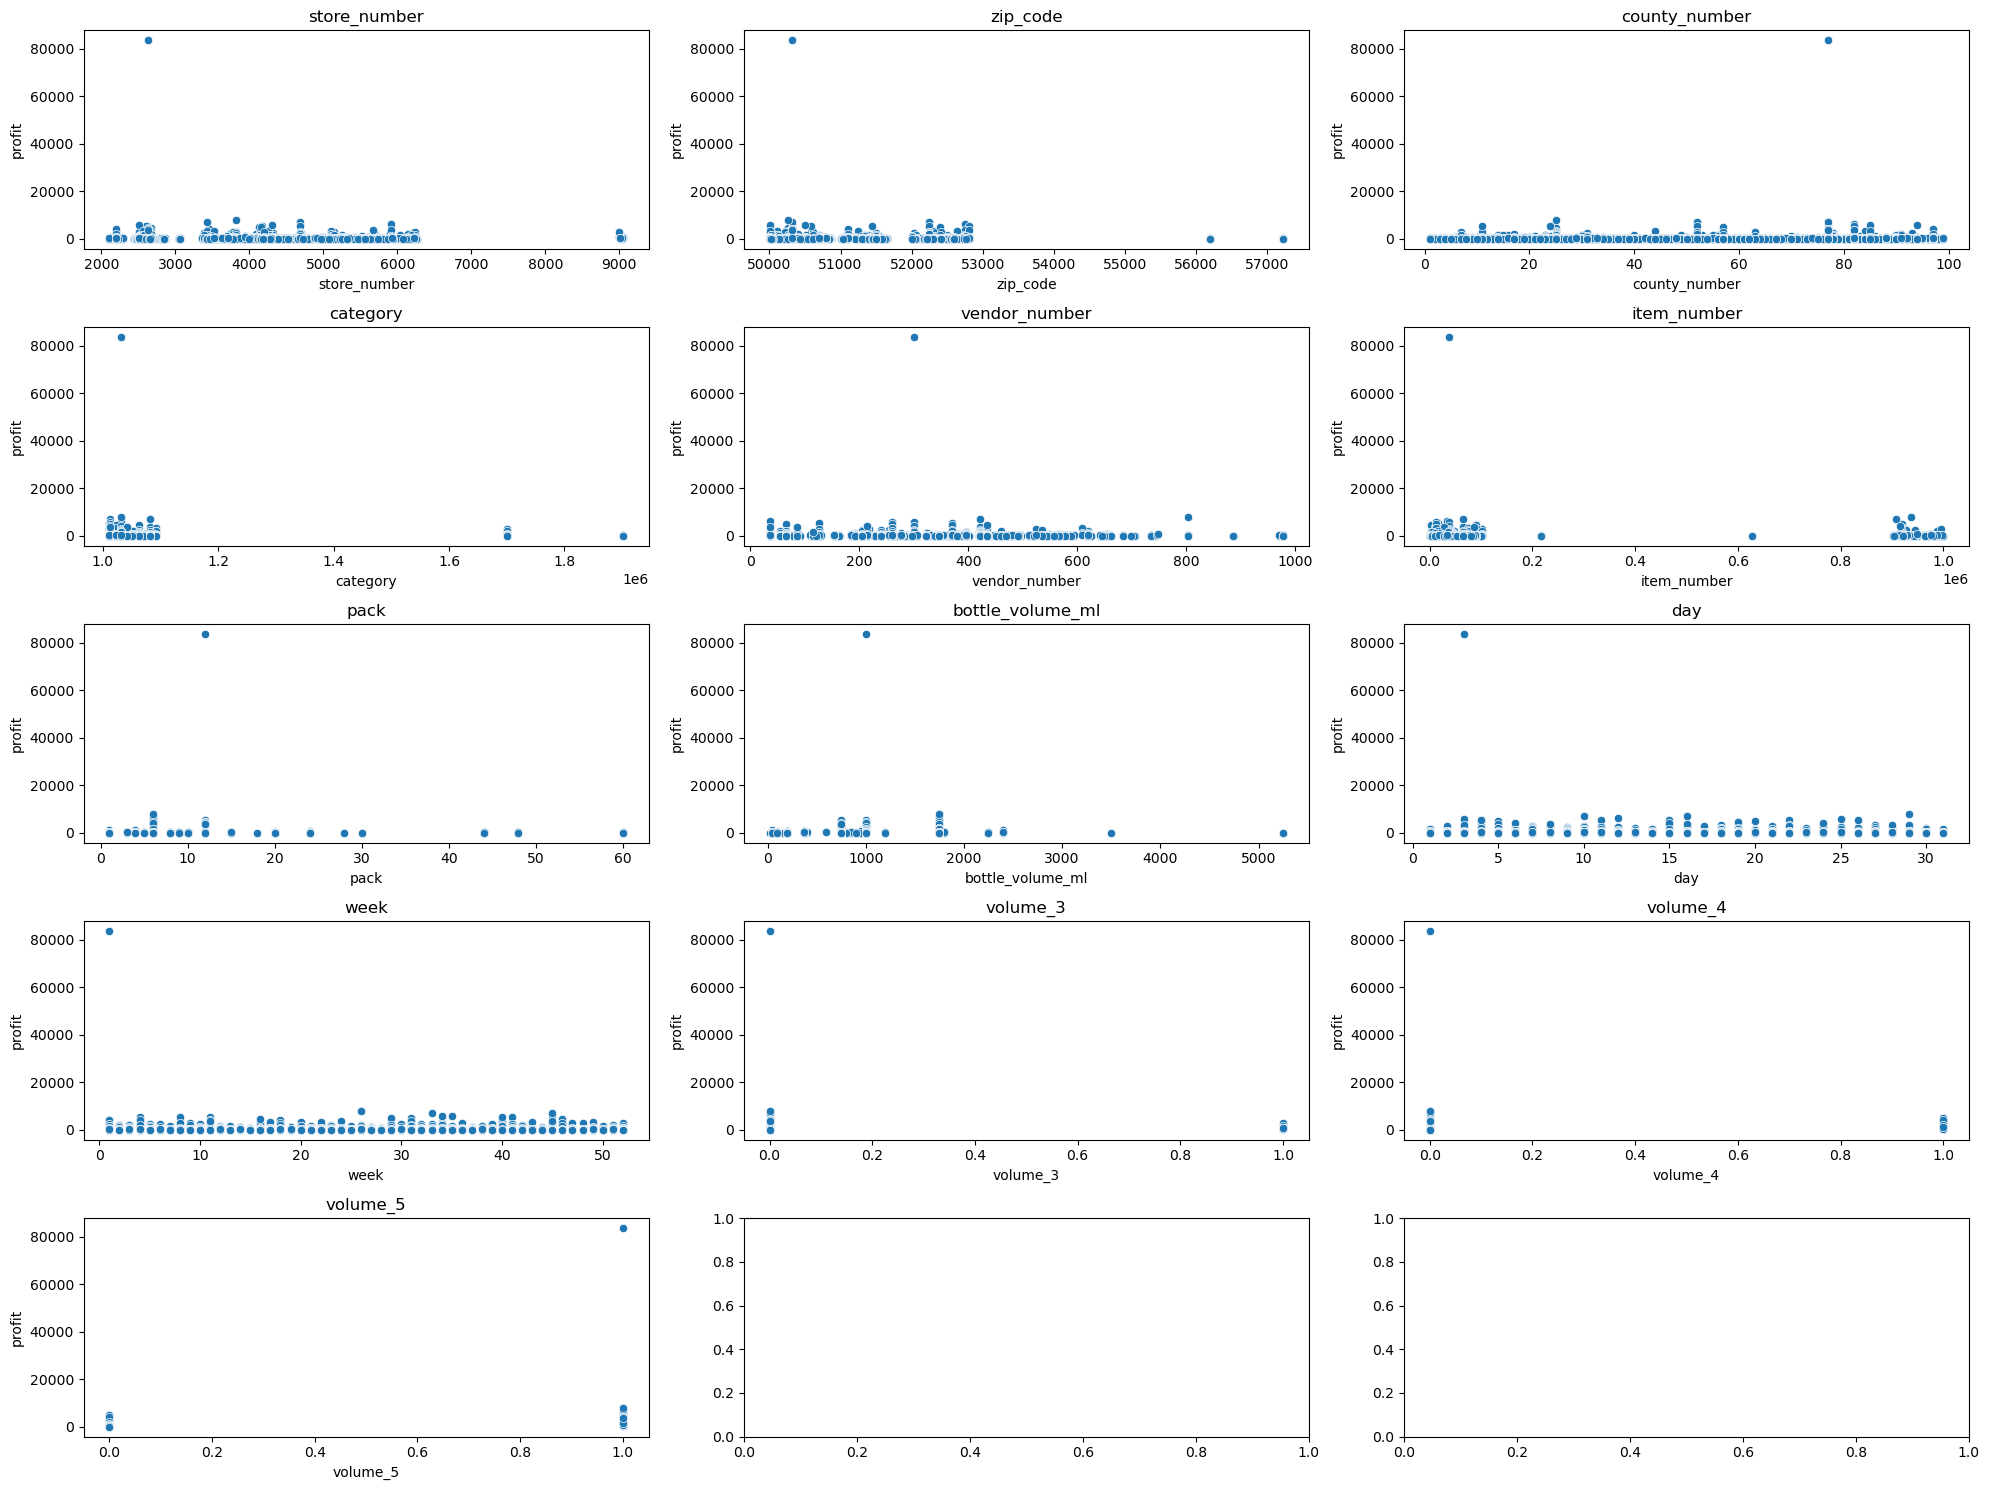

In [105]:
plt.subplots(5, 3, figsize=(20, 15))

count = 1

for col in X.columns:
    plt.subplot(5, 3, count)
    sns.scatterplot(x=X[col], y=y)
    plt.title(col)
    
    count += 1
    
plt.tight_layout()
plt.show()

From the above graph, we can see that there is no obvious linear relationship between X and y, lets see if there is high correlations between x variables.

In [106]:
X_corr = X.corr()
X_corr

,store_number,zip_code,county_number,category,vendor_number,item_number,pack,bottle_volume_ml,day,week,volume_3,volume_4,volume_5
store_number,1.000000,0.001577,-0.056729,0.005143,0.014723,0.000502,0.116228,-0.149702,0.006627,0.027884,-0.046660,-0.038150,-0.026504
zip_code,0.001577,1.000000,-0.057560,0.008269,-0.012373,-0.000600,0.016877,0.002436,-0.015123,0.005634,-0.011669,0.002124,-0.005483
county_number,-0.056729,-0.057560,1.000000,0.000812,-0.009843,0.004343,0.025866,-0.046635,-0.001867,-0.014962,0.009322,0.002193,0.005513
category,0.005143,0.008269,0.000812,1.000000,0.031251,0.191741,-0.066502,-0.044681,0.001172,0.049372,-0.003802,-0.004589,-0.006597
vendor_number,0.014723,-0.012373,-0.009843,0.031251,1.000000,0.074003,-0.027163,0.036988,-0.004691,0.036771,-0.000939,0.003420,0.008432
item_number,0.000502,-0.000600,0.004343,0.191741,0.074003,1.000000,-0.056087,-0.062513,0.001024,0.005168,0.003361,0.014777,0.023063
pack,0.116228,0.016877,0.025866,-0.066502,-0.027163,-0.056087,1.000000,-0.471617,0.001795,-0.016479,-0.028371,-0.026020,-0.030107
bottle_volume_ml,-0.149702,0.002436,-0.046635,-0.044681,0.036988,-0.062513,-0.471617,1.000000,-0.006319,-0.016353,0.074928,0.065558,0.075148
day,0.006627,-0.015123,-0.001867,0.001172,-0.004691,0.001024,0.001795,-0.006319,1.000000,0.087282,-0.015202,-0.006926,-0.005375
week,0.027884,0.005634,-0.014962,0.049372,0.036771,0.005168,-0.016479,-0.016353,0.087282,1.000000,-0.001644,-0.004406,-0.003233


Text(0.5, 1.0, 'Correlation Matrix')

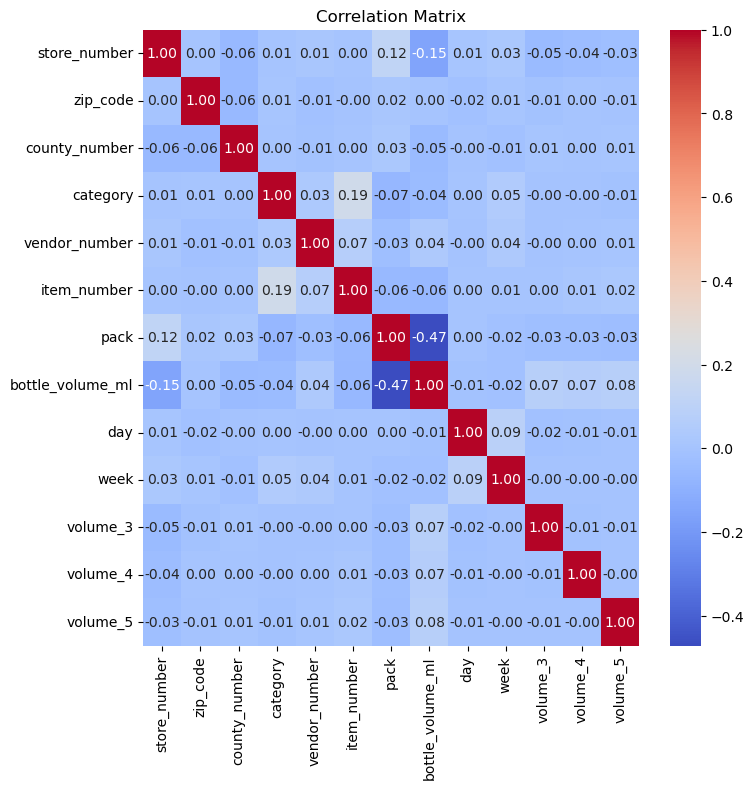

In [236]:
plt.figure(figsize=(8, 8))  
sns.heatmap(X_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')

Remove Outliers and Scale the data

In [212]:
numeric_columns = df9.select_dtypes(include=['float64', 'int64', 'uint8']).columns

In [213]:
columns_to_exclude = ['volume_3', 'volume_4', 'volume_5']

# Loop through the numeric columns and filter out outliers for columns not in the exclusion list
for column in numeric_columns:
    if column not in columns_to_exclude:
        # Calculate the mean and standard deviation for the column
        mean = df9[column].mean()
        std_dev = df9[column].std()

        # Define the cutoff for outliers (3 standard deviations from the mean)
        cutoff = std_dev * 3
        lower, upper = mean - cutoff, mean + cutoff

        # Filter out the outliers from the DataFrame
        df9 = df9[(df9[column] >= lower) & (df9[column] <= upper)]

In [214]:
numeric_columns = df9.select_dtypes(include=['float64', 'int64', 'uint8']).columns.tolist()

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numeric columns
df9[numeric_columns] = scaler.fit_transform(df9[numeric_columns])

In [215]:
mean = df9['profit'].mean()
std_dev = df9['profit'].std()
cutoff = std_dev * 3  # Three standard deviations from the mean
lower, upper = mean - cutoff, mean + cutoff
# Removing outliers
data_filtered = df9[(df9['profit'] >= lower) & (df9['profit'] <= upper)]

In [216]:
X = df9[numeric_columns].drop(['profit'], axis=1)
y = df9['profit']

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [218]:
# Add a constant term to the X matrix (intercept)
X_train_with_const = sm.add_constant(X_train)

# Fit a linear regression model with statsmodels
model = sm.OLS(y_train, X_train_with_const).fit()

# Get the summary statistics of the model
summary = model.summary()

In [219]:
print(summary)

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     2448.
Date:                Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:20:03   Log-Likelihood:                -41802.
No. Observations:               37457   AIC:                         8.363e+04
Df Residuals:                   37443   BIC:                         8.375e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0018      0.004  

In [220]:
y_t_pred = model.predict(sm.add_constant(X_train))

# Calculate metrics for training data
t_mse = mean_squared_error(y_train, y_t_pred)
t_mae = mean_absolute_error(y_train, y_t_pred)
t_rmse = np.sqrt(t_mse)
t_r2 = r2_score(y_train, y_t_pred)

print("Training Data Metrics:")
print(f"MSE: {t_mse}, MAE: {t_mae}, RMSE: {t_rmse}, R^2: {t_r2}")

Training Data Metrics:
MSE: 0.5455993210011686, MAE: 0.4187954597019523, RMSE: 0.7386469528815296, R^2: 0.45939708143272995


In [221]:
y_test_p = model.predict(sm.add_constant(X_test))

# Calculate metrics for test data
test_mse = mean_squared_error(y_test, y_test_p)
test_mae = mean_absolute_error(y_test, y_test_p)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_p)

print("Test Data Metrics:")
print(f"MSE: {test_mse}, MAE: {test_mae}, RMSE: {test_rmse}, R^2: {test_r2}")

Test Data Metrics:
MSE: 0.5263995946202068, MAE: 0.4201401587444379, RMSE: 0.7255340065222352, R^2: 0.4533759861633311


###

Re-run the model after removing columns that have high p-values(over 0.05)

In [222]:
X1= df9[numeric_columns].drop(['profit', 'pack', 'day'], axis=1)
y1= df9['profit']

In [223]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [224]:
X1_train_with_const = sm.add_constant(X1_train)

# Fit a linear regression model with statsmodels
model1 = sm.OLS(y1_train, X1_train_with_const).fit()

# Get the summary statistics of the model
summary1 = model1.summary()

In [225]:
print(summary1)

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     2892.
Date:                Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:20:26   Log-Likelihood:                -41804.
No. Observations:               37457   AIC:                         8.363e+04
Df Residuals:                   37445   BIC:                         8.373e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0018      0.004  

In [226]:
y1_t_pred = model1.predict(sm.add_constant(X1_train))

# Calculate metrics for training data
t_mse = mean_squared_error(y1_train, y1_t_pred)
t_mae = mean_absolute_error(y1_train, y1_t_pred)
t_rmse = np.sqrt(t_mse)
t_r2 = r2_score(y1_train, y1_t_pred)

print("Training Data Metrics:")
print(f"MSE: {t_mse}, MAE: {t_mae}, RMSE: {t_rmse}, R^2: {t_r2}")

Training Data Metrics:
MSE: 0.545659603288095, MAE: 0.41874681680983555, RMSE: 0.7386877576405981, R^2: 0.4593373511893152


In [227]:
y1_test_p = model1.predict(sm.add_constant(X1_test))

# Calculate metrics for test data
test_mse = mean_squared_error(y1_test, y1_test_p)
test_mae = mean_absolute_error(y1_test, y1_test_p)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y1_test, y1_test_p)

print("Test Data Metrics:")
print(f"MSE: {test_mse}, MAE: {test_mae}, RMSE: {test_rmse}, R^2: {test_r2}")

Test Data Metrics:
MSE: 0.5263271775985973, MAE: 0.4200369401412739, RMSE: 0.7254840987910054, R^2: 0.45345118546710506


The model does not show a significant difference in performance between the training and test datasets, which is good because it suggests that the model is not overfitting. However, the performance itself is not good because the R^2 values are very low, indicating that the model explains very little of the variation in the target variable. We need to intoduce more models to test our data.

###

### Decision Tree

In [228]:
# Select numeric columns from df9
numeric_columns = df9.select_dtypes(include=[np.number])

# Drop the specified columns from the numeric columns DataFrame
X1 = numeric_columns.drop(['profit', 'pack', 'day'], axis=1)

In [229]:
y1 = df9['profit']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [230]:
# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform
X1_train_scaled = pd.DataFrame(scaler.fit_transform(X1_train))

# Apply the same transformation to the test data
X1_test_scaled = pd.DataFrame(scaler.transform(X1_test))

In [231]:
decision_tree_scaled = DecisionTreeRegressor(random_state=42)
decision_tree_scaled.fit(X1_train_scaled, y1_train)

DecisionTreeRegressor(random_state=42)

In [232]:
from sklearn.metrics import r2_score

y1_train_pred = decision_tree_scaled.predict(X1_train_scaled)
y1_test_pred = decision_tree_scaled.predict(X1_test_scaled)

# Calculating the R2 score for both training and test sets
train_accuracy = r2_score(y1_train, y1_train_pred)
test_accuracy = r2_score(y1_test, y1_test_pred)

# Print the accuracy scores
print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.999933394242837
Test Set Accuracy: 0.3728625237278923


There is a big differenec between the 2 accuracy scores, we would like to build a better model by change parameters.

Find the best parameter of Max Depth

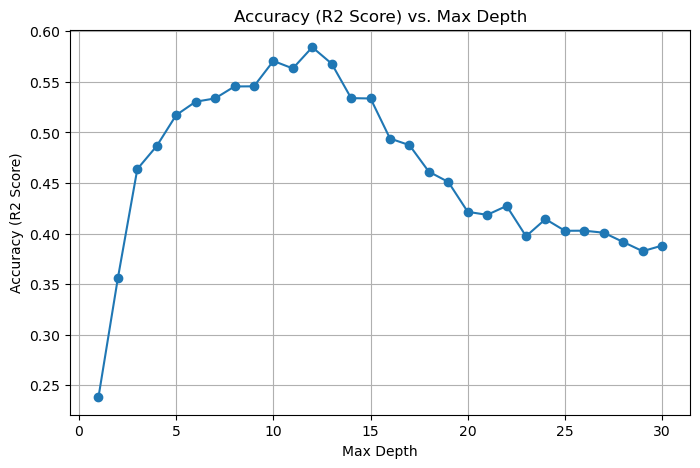

In [233]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

max_depth_values = range(1, 31)
accuracy_scores = []

for max_depth in max_depth_values:
    # Create and train the Decision Tree classifier with varying max_depth
    clf = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    clf.fit(X1_train_scaled, y1_train)  
    
    # Make predictions on the testing data (X1_test_scaled)
    y1_pred = clf.predict(X1_test_scaled)
    
    # Calculate accuracy (R2 score) and store it in the list
    accuracy = r2_score(y1_test, y1_pred) 
    accuracy_scores.append(accuracy)

# Create a line plot to visualize accuracy (R2 Score) vs. max_depth
plt.figure(figsize=(8, 5))
plt.plot(max_depth_values, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy (R2 Score) vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (R2 Score)')
plt.grid(True)
plt.show()

From the graph, we can see that the best parameter of max depth is 12.

In [234]:
decision_tree_max_depth_12 = DecisionTreeRegressor(max_depth=12, random_state=42)

# Train the model using the scaled training data
decision_tree_max_depth_12.fit(X1_train_scaled, y1_train)

# Make predictions on both the training and test sets
y1_train_pred = decision_tree_max_depth_12.predict(X1_train_scaled)
y1_test_pred = decision_tree_max_depth_12.predict(X1_test_scaled)

# Calculate the R2 score for both training and test sets
train_accuracy = r2_score(y1_train, y1_train_pred)
test_accuracy = r2_score(y1_test, y1_test_pred)

# Print the accuracy scores
print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.7352671273004556
Test Set Accuracy: 0.5843244236972833


An R2 score of around 0.735 on the test set means the model explains approximately 735% of the variance in the target variable, which is  acceptable depending on the complexity of the problem and the nature of the data.

In summary, while the decision tree model with `max_depth=12` shows some capability in predicting your target variable, there's a notable scope for improvement.There is still a big difference between test accuarcy and train accuarcy, which means overfitting.

###

### Random Forest

In [235]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create the Random Forest Regressor model
random_forest_model = RandomForestRegressor(random_state=42)

# Train the model on the training data
random_forest_model.fit(X1_train, y1_train)

# Make predictions on the training and test sets
y1_train_pred_rf = random_forest_model.predict(X1_train)
y1_test_pred_rf = random_forest_model.predict(X1_test)

# Evaluate the model
train_accuracy_rf = r2_score(y1_train, y1_train_pred_rf)
test_accuracy_rf = r2_score(y1_test, y1_test_pred_rf)

print("Random Forest Training Set Accuracy:", train_accuracy_rf)
print("Random Forest Test Set Accuracy:", test_accuracy_rf)

Random Forest Training Set Accuracy: 0.9517858136915537
Random Forest Test Set Accuracy: 0.6805574476585619


###

### Compare Models

In [244]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Linear Regression Model Metrics
y1_test_p = model1.predict(sm.add_constant(X1_test))
test_mse_linear = mean_squared_error(y1_test, y1_test_p)
test_mae_linear = mean_absolute_error(y1_test, y1_test_p)
test_rmse_linear = np.sqrt(test_mse_linear)
test_r2_linear = r2_score(y1_test, y1_test_p)

# Decision Tree Model Metrics
y1_test_pred_decision_tree = decision_tree_max_depth_12.predict(X1_test)
test_mse_decision_tree = mean_squared_error(y1_test, y1_test_pred_decision_tree)
test_mae_decision_tree = mean_absolute_error(y1_test, y1_test_pred_decision_tree)
test_rmse_decision_tree = np.sqrt(test_mse_decision_tree)
test_r2_decision_tree = r2_score(y1_test, y1_test_pred_decision_tree)

# Random Forest Model Metrics
y1_test_pred_rf = random_forest_model.predict(X1_test)
test_mse_random_forest = mean_squared_error(y1_test, y1_test_pred_rf)
test_mae_random_forest = mean_absolute_error(y1_test, y1_test_pred_rf)
test_rmse_random_forest = np.sqrt(test_mse_random_forest)
test_r2_random_forest = r2_score(y1_test, y1_test_pred_rf)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [250]:
decision = decision_tree_max_depth_12
linear=model1

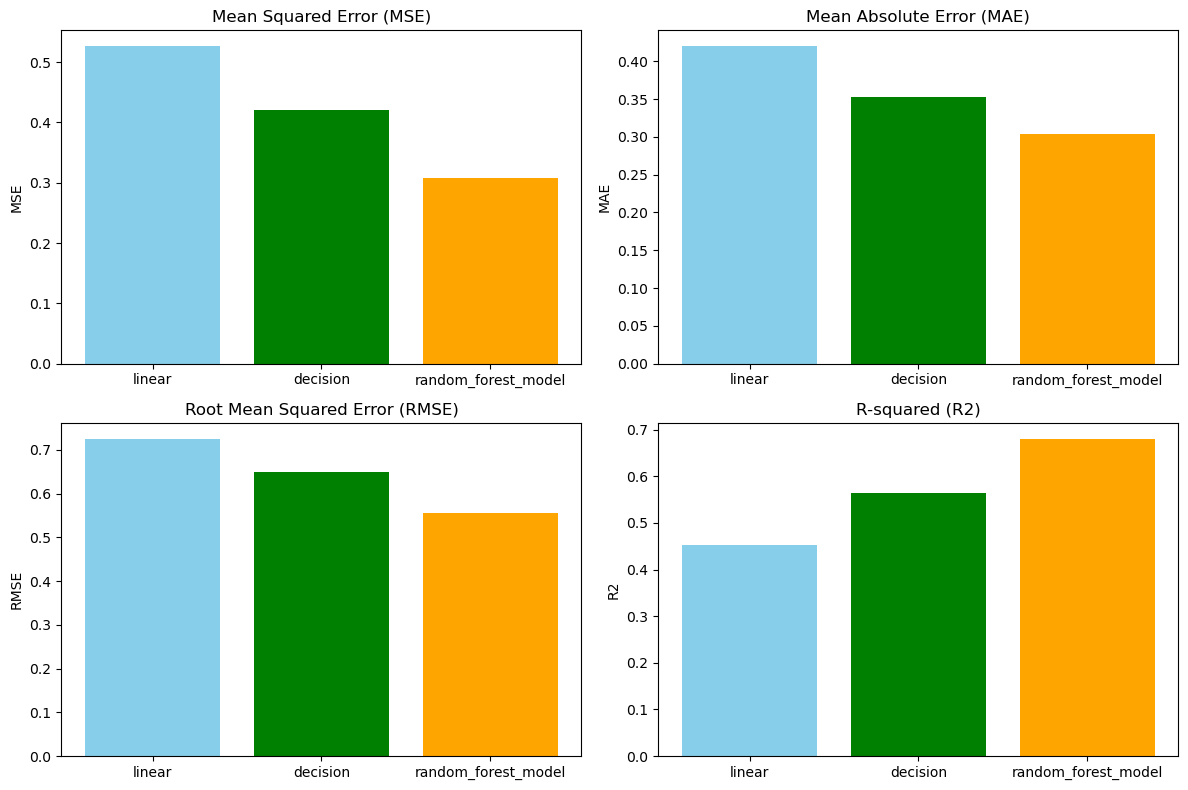

In [251]:
model_names = ['linear', 'decision', 'random_forest_model']
mse_values = [test_mse_linear, test_mse_decision_tree, test_mse_random_forest]
mae_values = [test_mae_linear, test_mae_decision_tree, test_mae_random_forest]
rmse_values = [test_rmse_linear, test_rmse_decision_tree, test_rmse_random_forest]
r2_values = [test_r2_linear, test_r2_decision_tree, test_r2_random_forest]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Mean Squared Error (MSE)
axs[0, 0].bar(model_names, mse_values, color=['skyblue', 'green', 'orange'])
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 0].set_ylabel('MSE')

# Plot Mean Absolute Error (MAE)
axs[0, 1].bar(model_names, mae_values, color=['skyblue', 'green', 'orange'])
axs[0, 1].set_title('Mean Absolute Error (MAE)')
axs[0, 1].set_ylabel('MAE')

# Plot Root Mean Squared Error (RMSE)
axs[1, 0].bar(model_names, rmse_values, color=['skyblue', 'green', 'orange'])
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].set_ylabel('RMSE')

# Plot R-squared (R2)
axs[1, 1].bar(model_names, r2_values, color=['skyblue', 'green', 'orange'])
axs[1, 1].set_title('R-squared (R2)')
axs[1, 1].set_ylabel('R2')

plt.tight_layout()
plt.show()

From the bar charts, we can indicate that the random forest model has the lowest MSE and RMSE, suggesting it has the smallest average squared errors and thus the best performance on these metrics.

Similarly, the random forest model has the lowest MAE, indicating it has the smallest average absolute errors.
The decision tree model has the highest R2 value, suggesting it can explain a higher proportion of variance than the other two models.
Considering that random forest performs best on the other three metrics, the random forest model can be considered the overall best performing model among the three.

In [ ]:
END